2019.10.06 Chapter3.1 建造第一个神经网络——回归
拟合数据

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


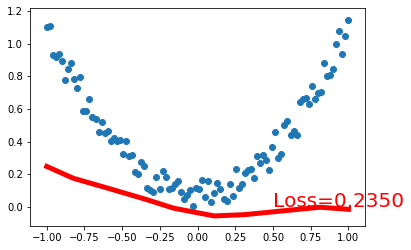

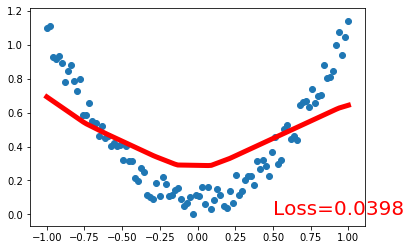

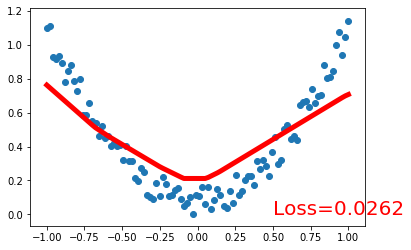

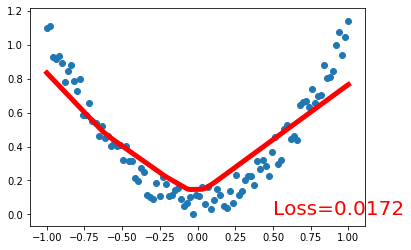

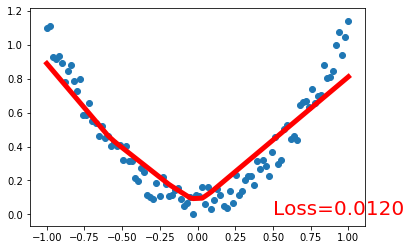

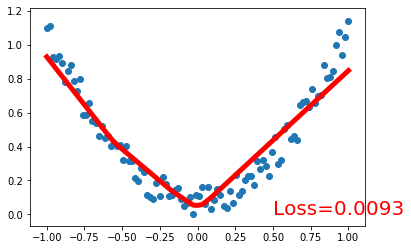

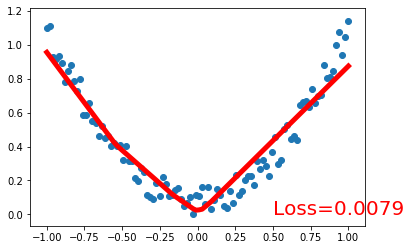

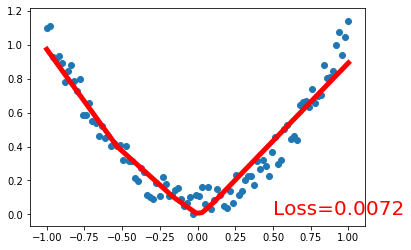

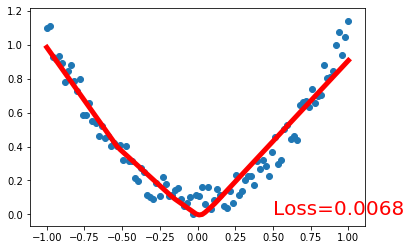

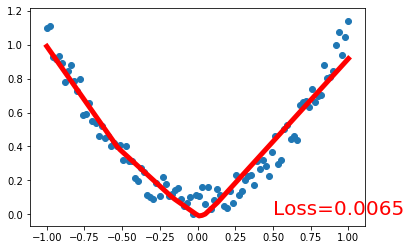

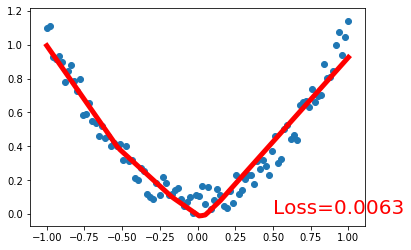

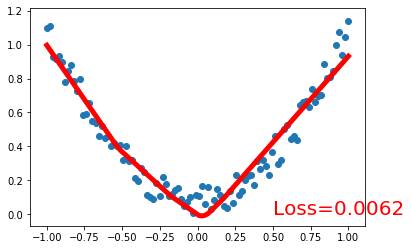

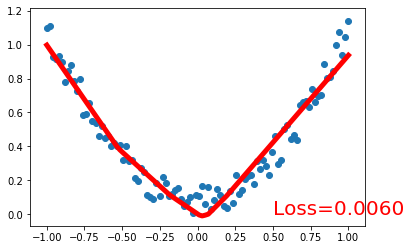

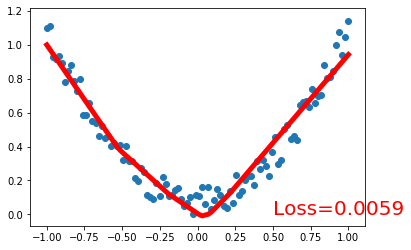

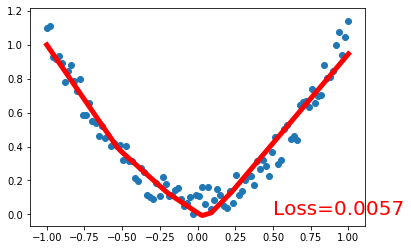

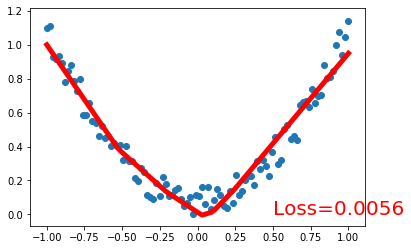

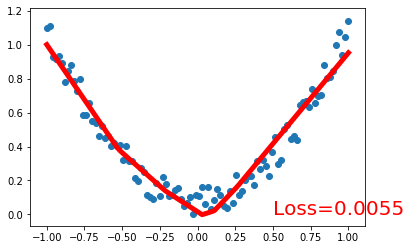

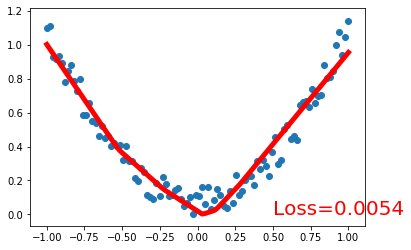

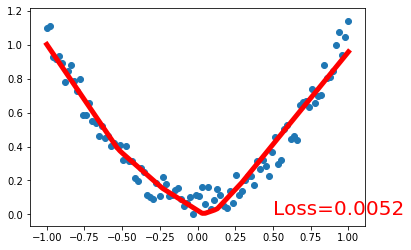

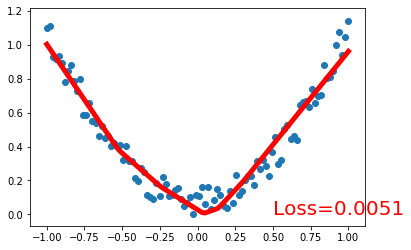

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Sat Sep 21 03:58:43 2019

@author: riema
"""

import torch
import torch.nn.functional as F      #激励函数都在这个模块当中
import matplotlib.pyplot as plt
                        #torch.nn是专门为神经网络设计的模块化接口。nn构建于autograd之
                        #上，可以用来定义和运行神经网络。

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1) 
                        #把一维的数据变为二维的数据，因为在torch只处理二维数据
                        #linspace()返回一个1维张量，包含在区间start和end上均匀间隔的step个点。
y = x.pow(2) + 0.2*torch.rand(x.size())
                        #二次方加上噪点的影响，来模拟真实的数据
                        #rand()返回一个张量，包含了从区间[0, 1)的均匀分布中抽
                        #取的一组随机数，张量的形状由参数sizes定义。

#plt.scatter(x.data.numpy(), y.data.numpy()) #打印散点图
#plt.show()

#开始定义神经网络
class Net(torch.nn.Module):      #nn.Module是nn中十分重要的类,包含网络各层的定义及forward方法；
                                 #定义自已的网络：需要继承nn.Module类，并实现forward方法；
                                 #一般把网络中具有可学习参数的层放在构造函数__init__()中；
    def __init__(self, n_feature, n_hidden, n_output):
        #nn.Module的子类函数必须在构造函数中执行父类的构造函数
        super(Net, self).__init__()                         #等价于nn.Module.__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)  #隐藏层的线性输出
        self.predict = torch.nn.Linear(n_hidden, n_output)  #输出层的线性输出       
    
    #真正搭建的过程, x为输入；只要在nn.Module的子类中定义了forward函数，backward函数就会被自动实现(利用Autograd)
    def forward(self,x):
        x = F.relu(self.hidden(x)) #激励函数 activation function for hidden layer
        x = self.predict(x)        #输出层输出 linear output
        return x

net = Net(1, 10, 1) #define the network: 1个输入，10个隐藏层，1个输出
#print(net) #查看神经网路的结构net architecture

#优化神经网络，optimizer是训练的工具
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)   #传入net的所有参数
loss_func = torch.nn.MSELoss()                          #预测值和真实值的误差计算公式（均方差）

plt.ion()  #使matplotlib的显示模式转换为交互（interactive）模式，即使遇到plt.show()代码还是会自动执行

for t in range(200):
    prediction = net(x)                 #给net输入训练数据，输出预测值
    loss = loss_func(prediction, y)     #计算两者的误差，注意保持预测值在前，真实值在后
    
    optimizer.zero_grad()               #将全部梯度降为0，清空上一步的残余更新参数值，clear gradients for next train
    loss.backward()                     #误差反向传递，计算参数更新值，backpropagation, compute gradients
    optimizer.step()                    #优化梯度，将参数更新至施加到net的parameters上
    
    #可视化整个训练过程
    if t % 5 == 0:
        plt.cla()       # Clear axis
        plt.scatter(x.data.numpy(), y.data.numpy())     #画出散点图
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' %loss.data.numpy(), fontdict={'size':20, 'color': 'red'})
        plt.pause(0.1)
        
plt.ioff()
plt.show()

2019.10.06 Chapter3.2 建造第一个神经网络——分类
多分类问题

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


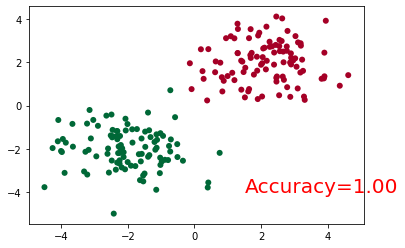

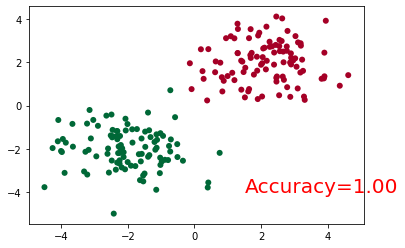

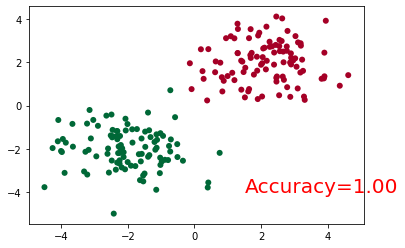

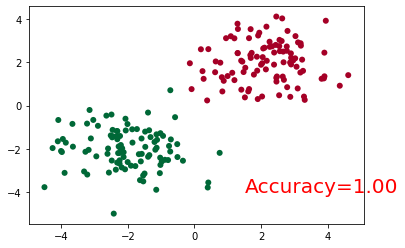

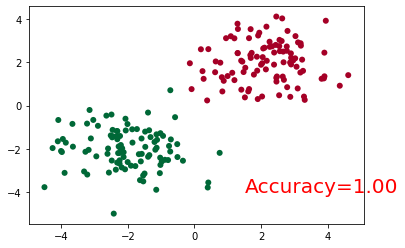

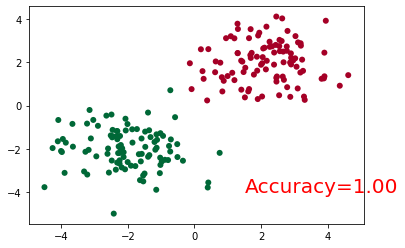

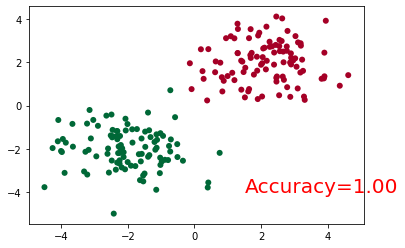

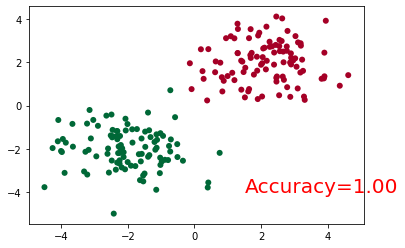

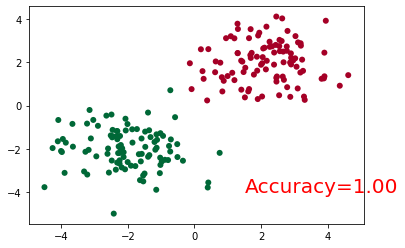

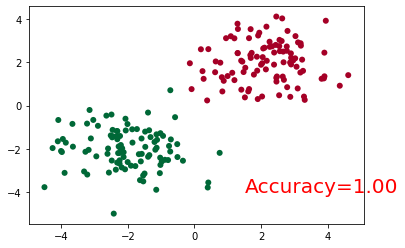

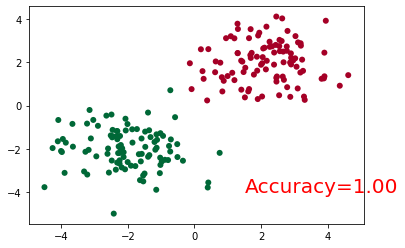

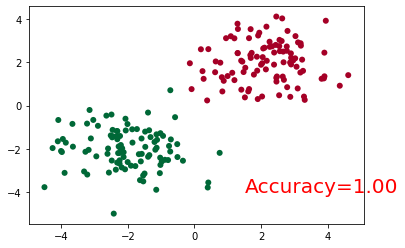

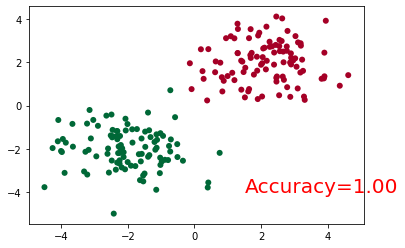

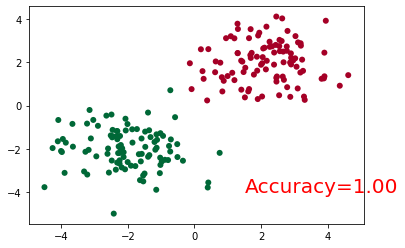

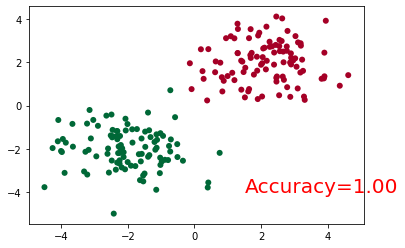

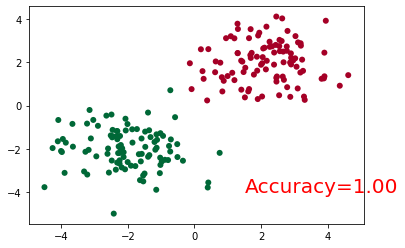

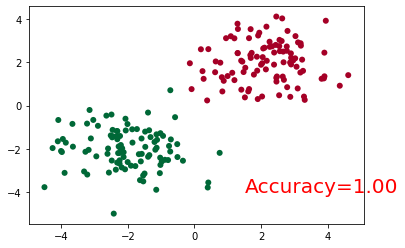

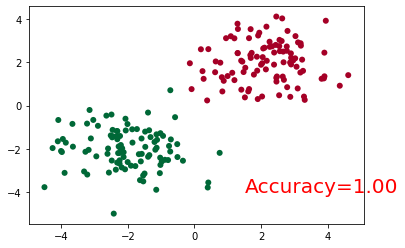

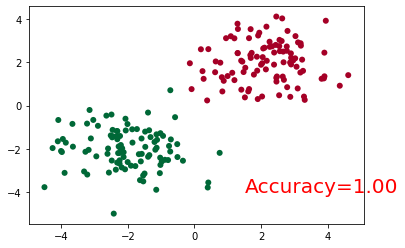

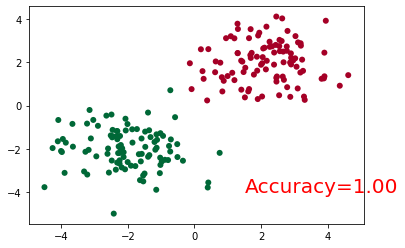

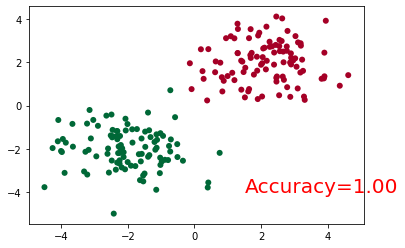

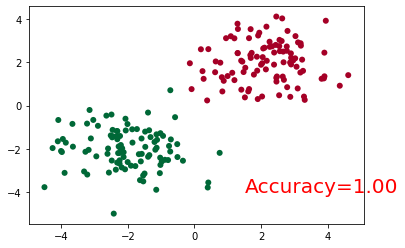

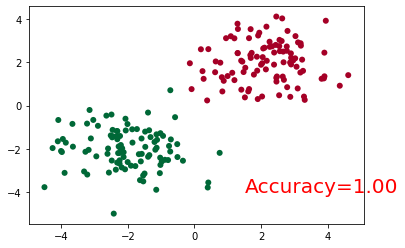

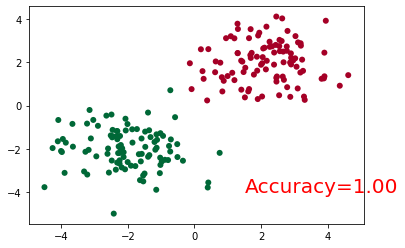

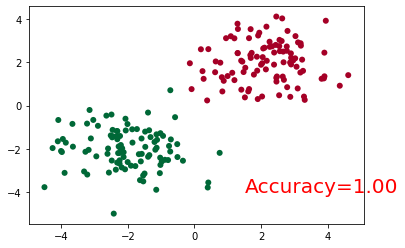

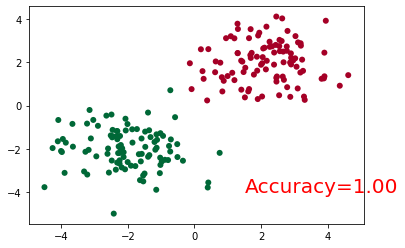

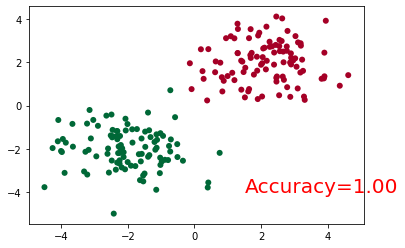

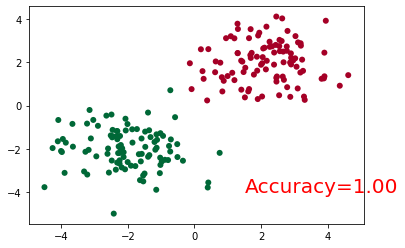

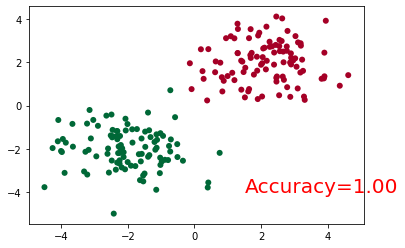

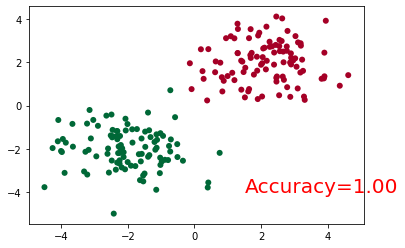

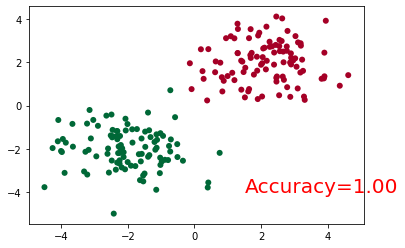

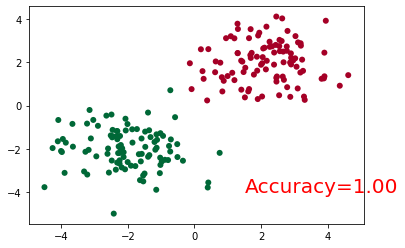

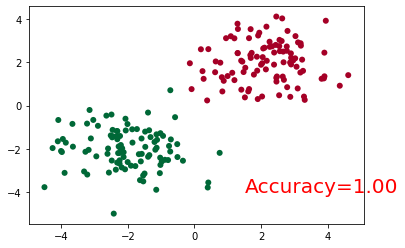

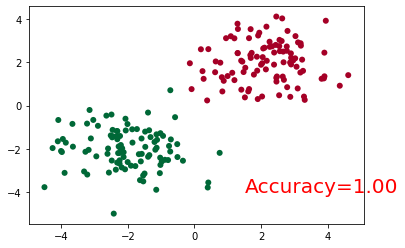

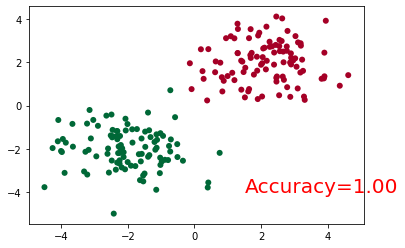

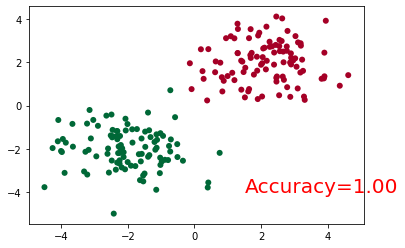

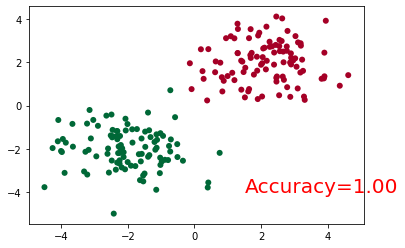

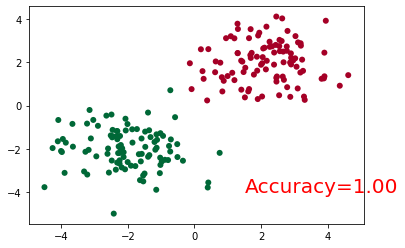

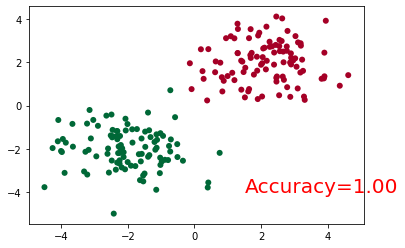

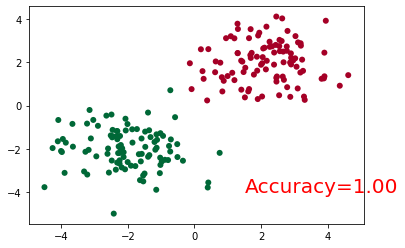

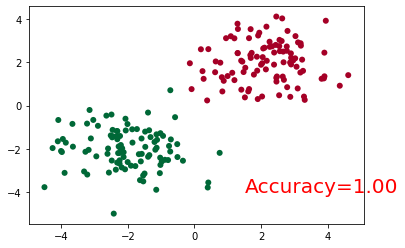

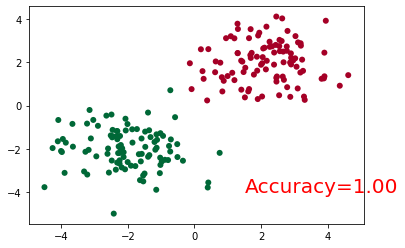

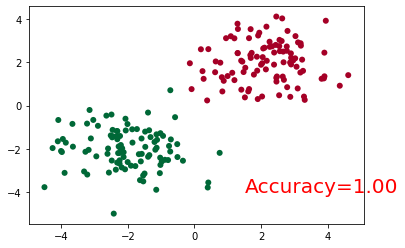

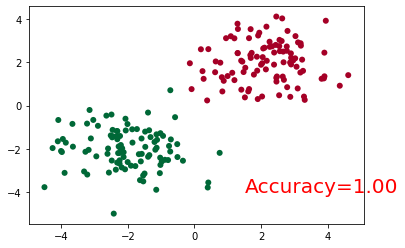

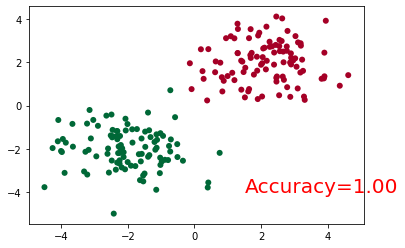

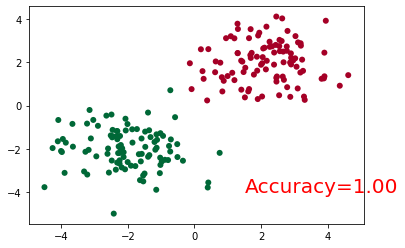

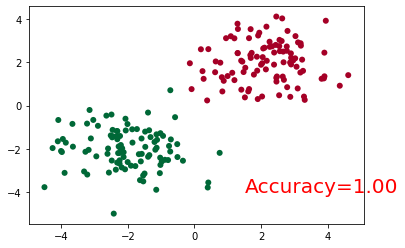

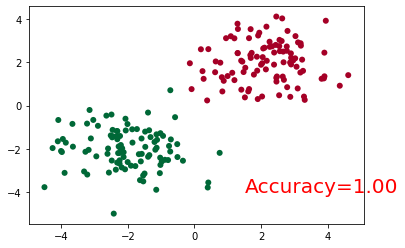

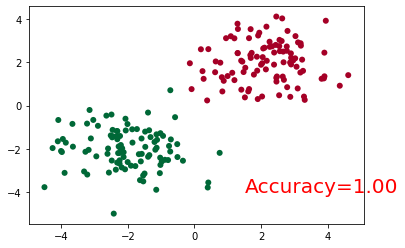

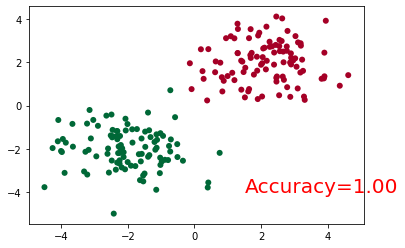

In [16]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

n_data = torch.ones(100,2) #数据的基本形态
x0 = torch.normal(2*n_data, 1)
y0 = torch.zeros(100) #类型标签
x1 = torch.normal(-2*n_data, 1)
y1 = torch.ones(100)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor) #FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)  #LongTensor = 64-bit integer

x, y = Variable(x),  Variable(y)
#plt.scatter(x.data.numpy()[:,0], x.data.numpy()[:,1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
#plt.show()

#搭建神经网络
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.out = torch.nn.Linear(n_hidden, n_output)
        
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.out(x)
        return x
    
net = Net(2,10,2)
print(net)

plt.ion() #打开交互模式
plt.show()

optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
loss_func = torch.nn.CrossEntropyLoss() #计算softmax

for t in range(100):
    out = net(x)
    loss = loss_func(out, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if t % 2 == 0:
        plt.cla()
        prediction = torch.max(F.softmax(out), 1)[1]  #过了一道 softmax 的激励函数后的最大概率才是预测值
        pred_y = y.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:,0], x.data.numpy()[:,1], c=pred_y, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y)/200   #预测中有多少和真实值一样
        plt.text(1.5, -4, 'Accuracy=%.2f' %accuracy, fontdict={'size':20, 'color':'red'})
        plt.pause(0.1)

plt.ioff() #在显示之前关闭交互模式
plt.show()

2019.10.06 Chapter3.3 建造第一个神经网络——快速搭建法
method1可以根据个人需要更加个性化自己的前向传播过程，比如（RNN）
method2中将激励函数也一同纳入，而在method1中激励函数是在forward中才被调用的

In [17]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt

#搭建神经网络method1
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.out = torch.nn.Linear(n_hidden, n_output)
        
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.out(x)
        return x
    
net1 = Net(2,10,2)

#搭建神经网络method2
net2 = torch.nn.Sequential(
    torch.nn.Linear(2, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 2)
)

print(net1)
print(net2)

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)
Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=2, bias=True)
)


2019.10.06 Chapter3.4 建造第一个神经网络——保存提取
保存两种形式，以及对应的两种提取方法

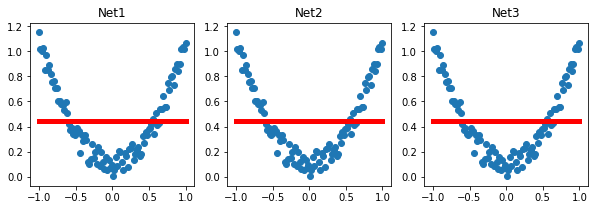

In [23]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

torch.manual_seed(1) #神经网络都需要初始化，此处用于设计随机初始化种子

x = torch.unsqueeze(torch.linspace(-1,1,100), dim=1)
y = x.pow(2) + 0.2*torch.rand(x.size())

def save():
    #建造网络
    net1 = torch.nn.Sequential(
        torch.nn.Linear(1,10),
        torch.nn.ReLU(),
        torch.nn.Linear(10,1)
    )
    optimizer = torch.optim.SGD(net1.parameters(), lr=0.5)
    loss_func = torch.nn.MSELoss()
    #训练数据
    for t in range(100):
        prediction = net1(x)
        loss = loss_func(prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    #两个保留途径
    torch.save(net1, 'net.pkl')  #保留了整个神经网络
    torch.save(net1.state_dict(), 'net_params.pkl') #保留了网络的parameters
    
    plt.figure(1, figsize=(10,3))
    plt.subplot(131)
    plt.title('Net1')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)

#提取整个神经网络，在网络较大的时候会比较慢
def restore_net():
    net2 = torch.load('net.pkl')
    prediction = net2(x)
    plt.subplot(132)
    plt.title('Net2')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    
    
#提取参数，在速度上优于第一种方法
def restore_params():
    net3 = torch.nn.Sequential(
        torch.nn.Linear(1,10),
        torch.nn.ReLU(),
        torch.nn.Linear(10,1)
    )
    #将保存的参数复制到net3
    net3.load_state_dict(torch.load('net_params.pkl'))
    prediction = net3(x)
    
    plt.subplot(133)
    plt.title('Net3')
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    plt.show()
    
save() #保存net1

restore_net() #提取整个网络

restore_params() #提取网络参数，复制到新网络

2019.10.06 Chapter3.5 建造第一个神经网络——批训练
数据非常大时，只需要训练其中的一小部分
minibatch-training

In [26]:
import torch
import torch.utils.data as Data
torch.manual_seed(1)

Batch_size = 5

x = torch.linspace(1, 10, 10)
y = torch.linspace(10, 1, 10)

torch_dataset = Data.TensorDataset(x,y)
                #使用data_tensor=x进行训练，target_tensor=y进行误差计算，这里原网站代码不能运行
loader = Data.DataLoader(
    dataset=torch_dataset,
    batch_size=Batch_size,
    shuffle=True,
#    num_workers=2,

) 
#使用loader进行分批训练，这里原网站上代码出错，

for epoch in range(3):
    for step, (batch_x, batch_y) in enumerate(loader):
        #开始训练
        print('Epoch:', epoch, '|Step:', step, '|batch x:', batch_x.numpy(), '|batch y:', batch_y.numpy())
        
        

Epoch: 0 |Step: 0 |batch x: [ 5.  7. 10.  3.  4.] |batch y: [6. 4. 1. 8. 7.]
Epoch: 0 |Step: 1 |batch x: [2. 1. 8. 9. 6.] |batch y: [ 9. 10.  3.  2.  5.]
Epoch: 1 |Step: 0 |batch x: [ 4.  6.  7. 10.  8.] |batch y: [7. 5. 4. 1. 3.]
Epoch: 1 |Step: 1 |batch x: [5. 3. 2. 1. 9.] |batch y: [ 6.  8.  9. 10.  2.]
Epoch: 2 |Step: 0 |batch x: [ 4.  2.  5.  6. 10.] |batch y: [7. 9. 6. 5. 1.]
Epoch: 2 |Step: 1 |batch x: [3. 9. 1. 8. 7.] |batch y: [ 8.  2. 10.  3.  4.]


2019.10.06 Chapter3.5 建造第一个神经网络——加速神经网络训练
数据量太大，或者结构过于复杂
SGD stochastic gradient descent 批量数据进行计算
W += -Learning rate * dx;
    Momentum
       m = b1 * m -Learning rate * dx;
       W += m
    AdaGrad
       v += dx^2
       W += -Learning rate * dx / v^0.5
    RMSProp
       v = b1 * v + (1-b1) * dx^2
       W += -Learning rate * dx / v^0.5
    Adam
       m = b1 * m + (1-b1) * dx
       v = b2 * v + (1-b2) * dx^2
       W += -Learning rate * m / v^0.5

2019.10.06 Chapter3.6 建造第一个神经网络——Optimizer优化器
比较前面几种优化器的性能

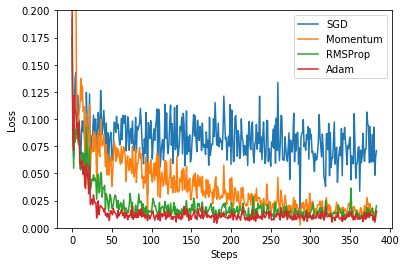

In [33]:
import torch
import torch.utils.data as Data
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

#hyper parameters
Lr = 0.01
Batch_size = 32
Epoch = 12

x = torch.unsqueeze(torch.linspace(-1,1,1000), dim=1)
y = x.pow(2) + 0.1*torch.normal(torch.zeros(*x.size()))

# plt.scatter(x.numpy(), y.numpy())
# plt.show()
torch_dataset = Data.TensorDataset(x,y)
loader = Data.DataLoader(dataset=torch_dataset, batch_size=Batch_size, shuffle=True)

#建立神经网络
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(1,20)
        self.predict = torch.nn.Linear(20,1)
    
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x
    
#对比四个优化器
net_SGD = Net()
net_Momentum = Net()
net_RMSProp = Net()
net_Adam = Net()
nets = [net_SGD, net_Momentum, net_RMSProp, net_Adam]

opt_SGD = torch.optim.SGD(net_SGD.parameters(), lr=Lr)
opt_Momentum = torch.optim.SGD(net_Momentum.parameters(), lr=Lr, momentum=0.8)
opt_RMSProp = torch.optim.RMSprop(net_RMSProp.parameters(), lr=Lr, alpha=0.9)
opt_Adam = torch.optim.Adam(net_Adam.parameters(), lr=Lr, betas=(0.9,0.99))
optimizers = [opt_SGD, opt_Momentum, opt_RMSProp, opt_Adam]

loss_func = torch.nn.MSELoss()
losses_his = [[],[],[],[]]

for epoch in range(Epoch):
    #print(epoch)
    for step, (batch_x, batch_y) in enumerate(loader):
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)
        
        for net, opt, l_his in zip(nets, optimizers, losses_his):
            output = net(b_x)
            loss = loss_func(output, b_y)
            opt.zero_grad()
            loss.backward()
            opt.step()
            l_his.append(loss.data.numpy())
labels = ['SGD', 'Momentum', 'RMSProp', 'Adam']
for i, l_his in enumerate(losses_his):
    plt.plot(l_his, label=labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0,0.2))
plt.show()



2019.10.07 Chapter4.1 高级神经网络——什么是卷积神经网络
应用：图片、语言识别、视频分析方面
基本结构
对每一小块像素信息的处理，连续性，加深了对图片的理解
批量过滤器，边缘信息—>高层信息—>分类
信息丢失—>池化技术
图片→卷积→池化→2层神经网络层→分类器

2019.10.07 Chapter4.2 高级神经网络——CNN卷积神经网络
常用于分析图像
MNIST手写数据

In [56]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt

#torch.manual_seed(1)

Epoch = 1
Batch_size = 50
Lr = 0.001

train_data =  torchvision.datasets.MNIST(
    root='./mnist/',
    train=True,
    transform=torchvision.transforms.ToTensor(),
    download=True
)

# print(train_data.train_data.size())
# print(train_data.train_labels.size())
# plt.imshow(train_data.train_data[0].numpy(), cmap='gray')
# plt.title('%i'%train_data.train_labels[0])
# plt.show()

test_data = torchvision.datasets.MNIST(root='./mnist', train=False)
train_loader = Data.DataLoader(dataset=train_data, batch_size=Batch_size, shuffle=True)

test_x = torch.unsqueeze(test_data.test_data, dim=1).type(torch.FloatTensor)[:2000]/255
test_y = test_data.test_labels[:2000]

#开始建立CNN网络
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=16,
                kernel_size=5,
                stride=1,
                padding=2
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.out = nn.Linear(32*7*7, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)  #view()函数作用是将一个多行的Tensor,拼接成一行。
        output = self.out(x)
        return output
    
cnn = CNN()
#print(cnn)

optimizer = torch.optim.Adam(cnn.parameters(), lr=Lr)
loss_func = nn.CrossEntropyLoss()

for epoch in range(Epoch):
    for step, (x,y) in enumerate(train_loader):
        b_x = Variable(x)
        b_y = Variable(y)
                         
        output =cnn(b_x)
        loss = loss_func(output, b_y)
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step()                # apply gradients 
 
test_output = cnn(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y, 'prediction number')
print(test_y[:10].numpy(), 'real number')               

[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number


2019.10.07 Chapter4.3 高级神经网络——循环神经网络RNN

2019.10.07 Chapter4.4 高级神经网络——LSTM RNN
Long Short-Term Memory 长短期记忆
普通RNN的缺陷：梯度消失/梯度弥散、梯度爆炸
LSTM－RNN：多出了三个控制器（输入、输出、忘记）

2019.10.07 Chapter4.５ 高级神经网络——循环神经网络（分类）RNN＿Classifier

In [1]:
import torch
from torch import nn
from torch.autograd import Variable
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

Epoch = 1
Batch_size = 64 #批训练数量
Time_step = 28
Input_size = 28
Lr = 0.01

train_data = dsets.MNIST(root='./mnist', train=True, transform=transforms.ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=Batch_size, shuffle=True)

test_data = dsets.MNIST(root='./mnist', train=False, transform=transforms.ToTensor())

test_x = Variable(test_data.test_data).type(torch.FloatTensor)[:2000]/255
test_y = test_data.test_labels[:2000]

#定义RNN网络
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        
        self.rnn = nn.LSTM(
            input_size = 28,
            hidden_size = 64,
            num_layers = 1,
            batch_first = True
        )
        
        self.out = nn.Linear(64,10)
        
    def forward(self, x):
        r_out, (h_n, h_c) = self.rnn(x, None)
        out = self.out(r_out[:,-1,:])
        return out
        
rnn = RNN()
#print(rnn)

optimizer = torch.optim.Adam(rnn.parameters(), lr=Lr)
loss_func = nn.CrossEntropyLoss()

for epoch in range(Epoch):
    for step, (x, y) in enumerate(train_loader):
        b_x = Variable(x.view(-1, 28, 28))
        b_y = Variable(y)
        output = rnn(b_x)
        loss = loss_func(output, b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
#        if step % 50 == 0:
#            test_output = rnn(test_x)
#            pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
#            accuracy = sum(pred_y == test_y) / test_y.size
#            print('Epoch:', epoch)
            
test_output = rnn(test_x[:10].view(-1, 28, 28))
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y, 'prediction number')
print(test_y[:10], 'real number')

C:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\ProgramData\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


[7 2 1 0 4 1 4 9 6 9] prediction number
tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]) real number


2019.10.08 Chapter4.6 高级神经网络——循环神经网络(回归)RNN

In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(1)

Time_step = 10
Input_size = 1
Lr = 0.02

class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        
        self.rnn = nn.RNN(
            input_size = 1,
            hidden_size = 32,
            num_layers = 1,
            batch_first = True
        )
        
        self.out = nn.Linear(32, 1)
        
#    def forward(self, x, h_state):
#        r_out, h_state = self.rnn(x, h_state)
#        r_out = r_out.view(-1, 32)
#        outs = self.out(r_out)
#        return outs.view(-1, 32, Time_step), h_state
    
    def forward(self, x, h_state):
        r_out, h_state = self.rnn(x, h_state)
        outs = []
        for time_step in range(r_out.size(1)):
            outs.append(self.out(r_out[:, time_step, :]))
        return torch.stack(outs, dim=1), h_state

rnn = RNN()
#print(rnn)

optimizer = torch.optim.Adam(rnn.parameters(), lr=Lr)
loss_func = nn.MSELoss()

h_state = None

plt.figure(1, figsize=(12,5))
plt.ion()

for step in range(100):
    start, end = step * np.pi, (step+1) * np.pi
    steps = np.linspace(start, end, Time_step, dtype=np.float32)
    x_np = np.sin(steps)
    y_np = np.cos(steps)
    
    x = torch.from_numpy(x_np[np.newaxis, :, np.newaxis])
    y = torch.from_numpy(y_np[np.newaxis, :, np.newaxis])
    
    prediction, h_state = rnn(x, h_state)
    h_state = h_state.data
    
    loss = loss_func(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    plt.plot(steps, y_np.flatten(), 'r-')
    plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
    plt.draw()
    plt.pause(0.05)

plt.ioff()
plt.show()

<Figure size 1200x500 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

2019.10.08 Chapter4.7 高级神经网络——自编码(Autoencoder)
神经网络的非监督形式的学习
压缩→解压
提取原数据种最具代表性的信息，然后再学习
优于PCA主成分分析

2019.10.08 Chapter4.8 高级神经网络——自编码PyTorch tutorial

In [ ]:
import torch 
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

Epoch = 10
Batch_size = 64
Lr = 0.005
N_test_img = 5

train_data = torchvision.datasets.MNIST(
    root='./mnist',
    train=True,
    transform=torchvision.transforms.ToTensor(),
    download=True,
)

train_loader = Data.DataLoader(dataset=train_data, batch_size=Batch_size, shuffle=True)

#print(train_data.train_data.size())
#print(train_data.train_labels.size())
#plt.imshow(train_data.train_data[2].numpy(), cmap='gray')
#plt.title('%i'%train_data.train_labels[2])
#plt.show()

class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        #压缩
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.Tanh(),
            nn.Linear(128, 64),
            nn.Tanh(),
            nn.Linear(64,12),
            nn.Tanh(),
            nn.Linear(12, 3)
        )
        
        #解压
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.Tanh(),
            nn.Linear(12, 64),
            nn.Tanh(),
            nn.Linear(64, 128),
            nn.Tanh(), 
            nn.Linear(128, 28*28),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded
    
autoencoder = AutoEncoder()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=Lr)
loss_func = nn.MSELoss()

f, a = plt.subplots(2, N_test_img, figsize=(5,2))
plt.ion()

view_data = train_data.train_data[:N_test_img].view(-1, 28*28).type(torch.FloatTensor)/255
for i in range(N_test_img):
    a[0][i].imshow(np.reshape(view_data.data.numpy()[i], (28, 28)), cmap='gray')
    a[0][i].set_xticks(())
    a[0][i].set_yticks(())

for epoch in range(Epoch):
    for step, (x, b_label) in enumerate(train_loader):
        b_x = x.view(-1, 28*28)
        b_y = x.view(-1, 28*28)
        
        encoded, decoded = autoencoder(b_x)
        
        loss = loss_func(decoded, b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step % 100 == 0:
            print('Epoch:', epoch, '|train loss: %.4f' %loss.data.numpy())
            
            _, decoded_data = autoencoder(view_data)
            for i in range(N_test_img):
                a[1][i].clear()
                a[1][i].imshow(np.reshape(decoded_data.data.numpy()[i], (28,28)), cmap='gray')
                a[1][i].set_xticks(())
                a[1][i].set_yticks(())
            plt.draw()
            plt.pause(0.05)
plt.ioff()
plt.show()

view_data = train_data.train_data[:200].view(-1, 28*28).type(torch.FloatTensor)/255
encoded_data, _ = autoencoder(view_data)
fig = plt.figure(2)
ax = Axes3D(fig)
X,Y,Z = encoded_data.data[:, 0].numpy(), encoded_data.data[:, 1].numpy(), encoded_data.data[:, 2].numpy()
values = train_data.train_labels[:200].numpy()
for x,y,z,s in zip(X,Y,Z,values):
    c = cm.rainbow(int(255*s/9))
    ax.text(x, y, z, s, backgroundcolor=c)
ax.set_xlim(X.min(), X.max())
ax.set_ylim(Y.min(), Y.max())
ax.set_zlim(Z.min(), Z.max())
plt.show()

2019.10.08 Chapter4.9 高级神经网络——DQN
Deep Q Network 打电动
数据量太大时，表格形式有一定的缺陷
状态和动作→神经网络→Q值
Q(现实) Q(估计)

2019.10.08 Chapter4.10 高级神经网络——DQN强化学习
不经过我们的监督，自己学会某种操作
gym模块暂未安装，需要继续探索安装方法
以下代码未经验证

In [ ]:
import gym
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

Batch_size = 32
Lr = 0.01
Epsilon = 0.9
Gamma = 0.9
Target_replace_iter = 100
Memory_capacity = 2000
env = gym.make('CartPolr-v0')
env = env.unwrapped
N_actions = env.action_space.n
N_states = env.observation_space.shape[0]

Env_a_shape = 0 if isinstance(env.action_space.sample(), int) else env.action_space.sample().shape

#定义神经网络
class Net(nn.Module):
    def __init__(self, ):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(N_states, 50)
        self.fc1.weight.data.normal_(0, 0.1)    #initialization
        self.out = nn.Linear(50, N_actions)
        self.out.weight.data.normal_(0, 0.1)    #normal随机生成
        
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        actions_value = self.out(x)
        return actions_value
    
class DQN(object):
    def __init__(self):
        self.eval_net, self.target_net = Net(), Net()
        
        self.learn_step_counter = 0
        self.memory_counter = 0
        self.memory = np.zeros((Memory_capacity, N_states * 2 + 2))
        self.optimizer = torch.optim.Adam(self.eval_net.parameters(), lr=Lr)
        self.loss_func = nn.MSELoss()
        
    def choose_action(self, x):
        x = torch.unsqueeze(torch.FloatTensor(x), 0)
        if np.random.uniform() < Epsilon:#greedy
            action_value = self.eval_net.forward(x)
            action = torch.max(action_value, 1)[1].data.numpy()
            action = action[0] if Env_a_shape == 0 else action.reshape(Env_a_shape)
        else:
            action = np.random.randint(0, N_actions)
            action = action if Env_a_shape == 0 else action.reshape(Env_a_shape)
        return action
    
    def store_transition(self, s, a, r, s_):#存储到记忆库中
        transition = np.hstack((s, [a, r], s_))
        index = self.memory_counter % Memory_capacity
        self.memory[index, :] = transition
        self.memory_counter += 1
        
    def learn(self):
        #检测要不要更新target
        if self.learn_step_counter % Target_replace_iter == 0:
            self.target_net.load_state_dict(self.eval_net.state_dict()) #把后者的所有参数赋值到前者中
        self.learn_step_counter += 1
        
        sample_index = np.random.choice(Memory_capacity, Batch_size)
        b_memory = self.memory[sample_index, :]
        b_s = torch.FloatTensor(b_memory[:, :N_states])
        b_a = torch.FloatTensor(b_memory[:, N_states:N_states+1].astype(int))
        b_r = torch.FloatTensor(b_memory[:, N_states+1:N_states+2])
        b_s_ = torch.FloatTensor(b_memory[:, -N_states:])
        
        q_eval = self.eval_net(b_s).gather(1, b_a)
        q_next = self.target_net(b_s_).detach()
        q_target = b_r + Gamma * q_next.max(1)[0].view(Batch_size, 1)
        loss = self.loss_func(q_eval, q_target)
        
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
dqn = DQN()

for i_episode in range(400):
    s = env.reset()
    ep_r = 0
    while True:
        env.render()
        a = dqn.choose_action(s)
        
        s_, r, done, info = env.step(a)
        
        x, x_dot, theta, theta_dot = s_
        r1 = (env.x_threshold - abs(x)) / env.x_threshold - 0.8
        r2 = (env.theta_threshold_radians - abs(theta)) / env.theta_threshold_radians - 0.5
        r = r1 + r2
        dqn.store_transition(s, a, r, s_)
        
        ep_r += r
        
        if dqn.memory_counter > Memory_capacity:
            dqn.learn()
            if done:
                print('Ep:', i_episode, '| Ep_r:', round(ep_r, 2))
        if done:
            break
        
        s = s_

2019.10.12 Chapter4.11 高级神经网络——GAN生成对抗网络（Generative Adversarial Nets）
“凭空”捏造网络
Generator生成 Discriminator鉴别

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

Batch_size = 64
LR_G = 0.0001
LR_D = 0.0001
N_ideas = 5
Art_components = 15
Paint_points = np.vstack([np.linspace(-1, 1, Art_components) for _ in range(Batch_size)])

def artist_works():#生成著名画家的作品，2条曲线之间的区域
    a = np.random.uniform(1, 2, size=Batch_size)[:, np.newaxis]
    paintings = a * np.power(Paint_points, 2) + (a-1)
    paintings = torch.from_numpy(paintings).float()
    return paintings

G = nn.Sequential(#学习著名画家的作品，产生相似的作品
    nn.Linear(N_ideas, 128),    #随机灵感
    nn.ReLU(),
    nn.Linear(128, Art_components),
)

D = nn.Sequential(#新手鉴赏家，接收一幅画（15个点）
    nn.Linear(Art_components, 128),
    nn.ReLU(),
    nn.Linear(128, 1),
    nn.Sigmoid()#转化成百分比的形式
)

opt_D = torch.optim.Adam(D.parameters(), lr = LR_D)
opt_G = torch.optim.Adam(G.parameters(), lr = LR_G)

plt.ion()

for step in range(10000):
    artist_paintings = artist_works()   #著名画家的画作
    G_ideas = torch.randn(Batch_size, N_ideas)
    G_paintings = G(G_ideas)#新手画家的画作
    
    prob_artist0 = D(artist_paintings)
    prob_artist1 = D(G_paintings)
    
    D_loss = - torch.mean(torch.log(prob_artist0) + torch.log(1. - prob_artist1))
    G_loss = torch.mean(torch.log(1. - prob_artist1))
    
    opt_D.zero_grad()
    D_loss.backward(retain_graph = True) #保留参数给另一个结构
    opt_D.step()
    
    opt_G.zero_grad()
    G_loss.backward()
    opt_G.step()
    
    if step % 50 == 0:
        plt.cla()
        plt.plot(Paint_points[0], G_paintings.data.numpy()[0], c='#4AD631', lw=3, label='Generated painting')
        plt.plot(Paint_points[0], 2*np.power(Paint_points[0],2)+1, c='#74BCFF', lw=3, label='upper bound')
        plt.plot(Paint_points[0], 1*np.power(Paint_points[0],2)+0, c='#FF9359', lw=3, label='lower bound')
        plt.text(-.5, 2.3, 'D accuracy=%.2f (0.5 for D to converge)' % prob_artist0.data.numpy().mean(), fontdict={'size': 13})
        plt.text(-.5, 2, 'D score= %.2f (-1.38 for G to converge)' % -D_loss.data.numpy(), fontdict={'size': 13})
        plt.ylim((0, 3));plt.legend(loc='upper right', fontsize=10);plt.draw();plt.pause(0.01)

plt.ioff()
plt.show()

2019.10.12 Chapter5.1 为什么Torch是动态的
Tensorflow是静态的：先搭建好系统，一旦搭建好之后不再改动
dynamic_rnn()模块 动态搭建，动态计算

In [ ]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

Input_size = 1
LR = 0.02

class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        
        self.rnn = nn.RNN(
            input_size = 1,
            hidden_size = 32,
            num_layers = 1,
            batch_first = True
        )
        
        self.out = nn.Linear(32, 1)
        
    def forward(self, x, h_state):
        r_out, h_state = self.rnn(x, h_state)
        outs = []
        
        for time_step in range(r_out.size(1)):
            outs.append(self.out(r_out[:, time_step, :]))
        return torch.stack(outs, dim=1), h_state

rnn = RNN()
print(rnn)

optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)
loss_func = nn.MSELoss()

h_state = None

plt.figure(1, figsize=(12,5))
plt.ion()

step = 0
for i in range(60):
    dynamic_steps = np.random.randint(1, 4)
    start, end = step * np.pi, (step+dynamic_steps) * np.pi
    step += dynamic_steps
    
    steps = np.linspace(start, end, 10*dynamic_steps, dtype=np.float32)
    
    print(len(steps))
    
    x_np = np.sin(steps)
    y_np = np.cos(steps)
    
    x = torch.from_numpy(x_np[np.newaxis, :, np.newaxis])
    y = torch.from_numpy(y_np[np.newaxis, :, np.newaxis])
    
    prediction, h_state = rnn(x, h_state)
    h_state = h_state.data
    
    loss = loss_func(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    plt.plot(steps, y_np.flatten(), 'r-')
    plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
    plt.draw()
    plt.pause(0.05)
    
plt.ioff()
plt.show()

2019.10.12 Chapter5.2 GPU加速运算
必须是NVIDIA的显卡，且支持CUDA
需要在代码中强调所使用的是CPU还是GPU进行运算
以CNN为例

In [ ]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision

Epoch = 1
Batch_size = 50
LR = 0.001
Download_MNIST = True

train_data = torchvision.datasets.MNIST(root='./mnist/', train=True,\
                                        transform=torchvision.transforms.ToTensor(), download=Download_MNIST)

train_loader = Data.DataLoader(dataset=train_data, batch_size=Batch_size, shuffle=True)

test_data = torchvision.datasets.MNIST(root='./mnist/', train=True)

test_x = torch.unsqueeze(test_data.test_data, dim=1).type(torch.FloatTensor)[:2000].cuda()/255
test_y = test_data.test_labels[:2000].cuda()

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5,\
                                             stride=1, padding=2),nn.ReLU(), nn.MaxPool2d(kernel_size=2))
        
        self.conv2 = nn.Sequential(nn.Conv2d(16, 32, 5, 1, 2), nn.ReLU(), nn.MaxPool2d(2))
        self.out = nn.Linear(32*7*7, 10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output

cnn = CNN()

cnn.cuda()

optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)
loss_func = nn.CrossEntropyLoss()

for epoch in range(Epoch):
    for step, (x,y) in enumerate(train_loader):
        b_x = x.cuda()  #将数据移动到GPU中进行计算
        b_y = y.cuda()
        
        output = cnn(b_x)
        loss = loss_func(output, b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step % 50 == 0:
            test_output = cnn(test_x)
            
            pred_y = torch.max(test_output, 1)[1].cuda().data  #将计算图纸移动到GPU中
            accuracy = torch.sum(pred_y == test_y).type(torch.FloatTensor) / test_y.size(0)
            print('Epoch:', epoch, '| train loss: %.4f' %loss.data.cpu().numpy(), '| test accuracy: %.2f' %accuracy)
            
test_output = cnn(test_x[:10])

pred_y = torch.max(test_output, 1)[1].cuda().data

print(pred_y, 'prediction number')
print(test_y[:10], 'real number')

2019.10.13 Chapter5.3 过拟合
overfitting
解决：增加数据量、运用正则化L1,L2,L3,L4、Dropout regularization

2019.10.13 Chapter5.4 Dropout缓解过拟合

In [ ]:
import torch
import matplotlib.pyplot as plt

N_samples = 20
N_hidden = 300

#training data
x = torch.unsqueeze(torch.linspace(-1, 1, N_samples), 1)
y = x + 0.3*torch.normal(torch.zeros(N_samples, 1), torch.ones(N_samples, 1))

#test data
test_x = torch.unsqueeze(torch.linspace(-1, 1, N_samples), 1)
test_y = test_x + 0.3*torch.normal(torch.zeros(N_samples, 1), torch.ones(N_samples, 1))

#show data
plt.scatter(x.data.numpy(), y.data.numpy(), c='magenta', s=50, alpha=0.5, label='train')
plt.scatter(test_x.data.numpy(), test_y.data.numpy(), c='cyan', s=50, alpha=0.5, label='test')
plt.legend(loc='upper left')
plt.ylim((-2.5, 2.5))
plt.show()

#无能力处理过拟合现象的神经网络系统
net_overfitting = torch.nn.Sequential(
    torch.nn.Linear(1, N_hidden),
    torch.nn.ReLU(),
    torch.nn.Linear(N_hidden, N_hidden),
    torch.nn.ReLU(),
    torch.nn.Linear(N_hidden, 1)
)

#有能力处理过拟合的神经网路系统
net_dropped = torch.nn.Sequential(
    torch.nn.Linear(1, N_hidden),
    torch.nn.Dropout(0.5),#添加到层和activation function之间
    torch.nn.ReLU(),
    torch.nn.Linear(N_hidden, N_hidden),
    torch.nn.Dropout(0.5),#随机屏蔽50%的神经节点
    torch.nn.ReLU(),
    torch.nn.Linear(N_hidden, 1)
)

print(net_overfitting)
print(net_dropped)

optimizer_ofit = torch.optim.Adam(net_overfitting.parameters(), lr=0.01)
optimizer_drop = torch.optim.Adam(net_dropped.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss()

plt.ion()

for t in range(500):
    pred_ofit = net_overfitting(x)
    pred_drop = net_dropped(x)
    loss_ofit = loss_func(pred_ofit, y)
    loss_drop = loss_func(pred_drop, y)
    
    optimizer_ofit.zero_grad()
    optimizer_drop.zero_grad()
    
    loss_ofit.backward()
    loss_drop.backward()#误差反向传递
    
    optimizer_ofit.step()
    optimizer_drop.step()
    
    if t % 10 == 0:
        net_overfitting.eval()
        net_dropped.eval()
        
        plt.cla()
        
        test_pred_ofit = net_overfitting(test_x)
        test_pred_drop = net_dropped(test_x)
        
        plt.scatter(x.data.numpy(), y.data.numpy(), c='magenta', s=50, alpha=0.3, label='train')
        plt.scatter(test_x.data.numpy(), test_y.data.numpy(), c='cyan', s=50, alpha=0.3, label='test')
        plt.plot(test_x.data.numpy(), test_pred_ofit.data.numpy(), 'r-', lw=3, label='overfitting')
        plt.plot(test_x.data.numpy(), test_pred_drop.data.numpy(), 'b--', lw=3, label='dropout(50%)')
        plt.text(0, -1.2, 'overfitting loss=%.4f' % loss_func(test_pred_ofit, test_y).data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.text(0, -1.5, 'dropout loss=%.4f' % loss_func(test_pred_drop, test_y).data.numpy(), fontdict={'size': 20, 'color': 'blue'})
        plt.legend(loc='upper left'); plt.ylim((-2.5, 2.5));plt.pause(0.1)

        # change back to train mode
        net_overfitting.train()
        net_dropped.train()

plt.ioff()
plt.show()

2019.10.13 Chapter5.5 什么是标准化
让机器学习更容易学习到数据之间的规律
正向、反向Normalization
让数据在每一层中有效地传递下去

2019.10.13 Chapter5.6 批标准化Batch Normalization

In [ ]:
import torch
from torch import nn
from torch.nn import init
import torch.utils.data as Data
import matplotlib.pyplot as plt
import numpy as np

N_samples = 2000
Batch_size = 64
Epoch = 12
LR = 0.03
N_hidden = 8
Activation = torch.tanh
B_init = -0.2

x = np.linspace(-7, 10, N_samples)[:, np.newaxis]
noise = np.random.normal(0, 2, x.shape)
y = np.square(x) - 5 + noise

test_x = np.linspace(-7, 10, 200)[:, np.newaxis]
noise = np.random.normal(0, 2, test_x.shape)
test_y = np.square(test_x) - 5 + noise

train_x, train_y = torch.from_numpy(x).float(), torch.from_numpy(y).float()
test_x = torch.from_numpy(test_x).float()
test_y = torch.from_numpy(test_y).float()

train_dataset = Data.TensorDataset(train_x, train_y)
train_loader = Data.DataLoader(dataset=train_dataset, batch_size=Batch_size, shuffle=True, num_workers=2)

#show data
plt.scatter(train_x.numpy(), train_y.numpy(), c='#FF9359', s=50, alpha=0.2, label='train')
plt.legend(loc='upper left')

#建立神经网络
class Net(nn.Module):
    def __init__(self, batch_normalization=False):
        super(Net, self).__init__()
        self.do_bn = batch_normalization
        self.fcs = []
        self.bns = []
        self.bn_input = nn.BatchNorm1d(1, momentum=0.5)
        
        for i in range(N_hidden):
            input_size = 1 if i == 0 else 10#i=0表示为输入层
            fc = nn.Linear(input_size, 10)
            setattr(self, 'fc%i' %i, fc)
            self._set_init(fc)
            self.fcs.append(fc)
            if self.do_bn:
                bn = nn.BatchNorm1d(10, momentum=0.5)
                setattr(self, 'bn%i' %i, bn)
                self.bns.append(bn)
                
        self.predict = nn.Linear(10, 1)
        self._set_init(self.predict)
        
    def _set_init(self, layer):#随机初始化
        init.normal_(layer.weight, mean=0, std=1)
        init.constant_(layer.bias, B_init)
        
    def forward(self, x):
        pre_activation = [x]
        if self.do_bn:
            x = self.bn_input(x)
        layer_input = [x]
        for i in range(N_hidden):
            x = self.fcs[i](x)
            pre_activation.append(x)
            if self.do_bn:
                x =self.bns[i](x)
            x =Activation(x)
            layer_input.append(x)
        out = self.predict(x)
        return out, layer_input, pre_activation
    
nets = [Net(batch_normalization=False), Net(batch_normalization=True)]

opts =[torch.optim.Adam(net.parameters(), lr=LR) for net in nets]
loss_func = torch.nn.MSELoss()

def plot_histogram(l_in, l_in_bn, pre_ac, pre_ac_bn):
    for i, (ax_pa, ax_pa_bn, ax, ax_bn) in enumerate(zip(axs[0, :], axs[1, :], axs[2, :], axs[3, :])):
        [a.clear() for a in [ax_pa, ax_pa_bn, ax, ax_bn]]
        if i == 0:
            p_range = (-7, 10);the_range = (-7, 10)
        else:
            p_range = (-4, 4);the_range = (-1, 1)
        ax_pa.set_title('L' + str(i))
        ax_pa.hist(pre_ac[i].data.numpy().ravel(), bins=10, range=p_range, color='#FF9359', alpha=0.5);ax_pa_bn.hist(pre_ac_bn[i].data.numpy().ravel(), bins=10, range=p_range, color='#74BCFF', alpha=0.5)
        ax.hist(l_in[i].data.numpy().ravel(), bins=10, range=the_range, color='#FF9359');ax_bn.hist(l_in_bn[i].data.numpy().ravel(), bins=10, range=the_range, color='#74BCFF')
        for a in [ax_pa, ax, ax_pa_bn, ax_bn]: a.set_yticks(());a.set_xticks(())
        ax_pa_bn.set_xticks(p_range);ax_bn.set_xticks(the_range)
        axs[0, 0].set_ylabel('PreAct');axs[1, 0].set_ylabel('BN PreAct');axs[2, 0].set_ylabel('Act');axs[3, 0].set_ylabel('BN Act')
    plt.pause(0.01)


if __name__ == "__main__":
    f, axs = plt.subplots(4, N_hidden + 1, figsize=(10, 5))
    plt.ion()  # something about plotting
    plt.show()

    # training
    losses = [[], []]  # recode loss for two networks

    for epoch in range(Epoch):
        print('Epoch: ', epoch)
        layer_inputs, pre_acts = [], []
        for net, l in zip(nets, losses):
            net.eval()              # set eval mode to fix moving_mean and moving_var
            pred, layer_input, pre_act = net(test_x)
            l.append(loss_func(pred, test_y).data.item())
            layer_inputs.append(layer_input)
            pre_acts.append(pre_act)
            net.train()             # free moving_mean and moving_var
        plot_histogram(*layer_inputs, *pre_acts)     # plot histogram

        for step, (b_x, b_y) in enumerate(train_loader):
            for net, opt in zip(nets, opts):     # train for each network
                pred, _, _ = net(b_x)
                loss = loss_func(pred, b_y)
                opt.zero_grad()
                loss.backward()
                opt.step()    # it will also learns the parameters in Batch Normalization

    plt.ioff()

    # plot training loss
    plt.figure(2)
    plt.plot(losses[0], c='#FF9359', lw=3, label='Original')
    plt.plot(losses[1], c='#74BCFF', lw=3, label='Batch Normalization')
    plt.xlabel('step');plt.ylabel('test loss');plt.ylim((0, 2000));plt.legend(loc='best')

    # evaluation
    # set net to eval mode to freeze the parameters in batch normalization layers
    [net.eval() for net in nets]    # set eval mode to fix moving_mean and moving_var
    preds = [net(test_x)[0] for net in nets]
    plt.figure(3)
    plt.plot(test_x.data.numpy(), preds[0].data.numpy(), c='#FF9359', lw=4, label='Original')
    plt.plot(test_x.data.numpy(), preds[1].data.numpy(), c='#74BCFF', lw=4, label='Batch Normalization')
    plt.scatter(test_x.data.numpy(), test_y.data.numpy(), c='r', s=50, alpha=0.2, label='train')
    plt.legend(loc='best')
    plt.show()